In [2]:
import pandas as pd
from tqdm import tqdm_notebook as tqdm




# **1. Baca Dataset**

In [3]:
dftweet = pd.read_csv("mrtsemua.csv", encoding = "latin-1", usecols=["Text"])
tweets = pd.read_csv("mrtsemua.csv", encoding = "latin-1", usecols=["Text"])
tweets.columns = ["tweet"]
dftweet.columns = ["tweet"]
print(dftweet.columns)


Index(['tweet'], dtype='object')


In [4]:
dftweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 1 columns):
tweet    1140 non-null object
dtypes: object(1)
memory usage: 9.0+ KB


In [5]:
pd.set_option('max_colwidth', 0)
dftweet.head(10)

,tweet
0,MRT Jakarta pas pulang kerja vibesnya singapur bgt dah dan seneng bgt aku banya cewe cantik :)))))
1,"@Srisury15517295 Rencana di Jakarta, di Pacific Place, dulu waktu Burn the Stage movie, lumayan ga penuh2 amat, udh gitu bs pake MRT, ga ush nyetir macet2an??"
2,"@detikcom anak kecil juga tau. kami warga jakarta tidak butuh analisis beginian. Kami butuh solusinya. Misalnya percepat itu MRT tahap Kedua, Tahap Ketiga; LRT dan seterusnya."
3,@rinisetioo Untuk saat ini MRT Jakarta beroperasi normal.
4,"Lelah dengan macetnya Jakarta, turun dari taksi trus pindah mrt. https://t.co/QqxteaoKCB"
5,Hati-hati ke MRT Jakarta tar pecah Lo.pecah berarti membeli.MRT Indonesia keramik asli buatan Tibet China yg ajib mahal getoh deh.megang MRT Indonesia kudu hati2 soalnya import pake container punya Jokowi.MRT lecet bisa pecah.
6,"Selain #MudahkanHarimu, naik transportasi umum seperti KRL atau MRT Jakarta memiliki benefit lain loh. Yuk intip apa saja benefitnya!\n\n#WIKABeton\n#MudahkanHarimu https://t.co/0g5EvZr4Ir"
7,"Ada Sate Kambing hingga Penyetan Surabaya di Jalur MRT Menelusuri jalur MRT di Jakarta, Anda akan menemukan banyak kuliner enak. Salah satunya restoran legendaris yang tak jauh dari stasiun MRT. https://t.co/PyEe78P49n"
8,"@annichadya MRT membantu inter Jakarta, kita kan bukan Jakarta :("
9,"@tubirfess Kenape sekolahnya yg dihentikan? Industrinya lah yg dihentikan. Adain ""car free week"", di seluruh Jakarta (tapi gratiskan TJ, MRT, Commuter Line, dll)"


In [6]:
import re
import string

# **2. Casefolding**

In [7]:
def casefolding(tweet):
    tweet = tweet.lower().strip() #case folding
    return tweet


hasilcf = []
for tweet in tqdm(dftweet['tweet']):
    pro = casefolding(tweet)
    hasilcf.append(pro)

dftweet = pd.DataFrame({"tweet": hasilcf})
dftweet.to_csv('casefolding.csv')
dftweet.rename(columns={"tweet": "Hasil Case Folding"}).head(10)



,Hasil Case Folding
0,mrt jakarta pas pulang kerja vibesnya singapur bgt dah dan seneng bgt aku banya cewe cantik :)))))
1,"@srisury15517295 rencana di jakarta, di pacific place, dulu waktu burn the stage movie, lumayan ga penuh2 amat, udh gitu bs pake mrt, ga ush nyetir macet2an??"
2,"@detikcom anak kecil juga tau. kami warga jakarta tidak butuh analisis beginian. kami butuh solusinya. misalnya percepat itu mrt tahap kedua, tahap ketiga; lrt dan seterusnya."
3,@rinisetioo untuk saat ini mrt jakarta beroperasi normal.
4,"lelah dengan macetnya jakarta, turun dari taksi trus pindah mrt. https://t.co/qqxteaokcb"
5,hati-hati ke mrt jakarta tar pecah lo.pecah berarti membeli.mrt indonesia keramik asli buatan tibet china yg ajib mahal getoh deh.megang mrt indonesia kudu hati2 soalnya import pake container punya jokowi.mrt lecet bisa pecah.
6,"selain #mudahkanharimu, naik transportasi umum seperti krl atau mrt jakarta memiliki benefit lain loh. yuk intip apa saja benefitnya!\n\n#wikabeton\n#mudahkanharimu https://t.co/0g5evzr4ir"
7,"ada sate kambing hingga penyetan surabaya di jalur mrt menelusuri jalur mrt di jakarta, anda akan menemukan banyak kuliner enak. salah satunya restoran legendaris yang tak jauh dari stasiun mrt. https://t.co/pyee78p49n"
8,"@annichadya mrt membantu inter jakarta, kita kan bukan jakarta :("
9,"@tubirfess kenape sekolahnya yg dihentikan? industrinya lah yg dihentikan. adain ""car free week"", di seluruh jakarta (tapi gratiskan tj, mrt, commuter line, dll)"


# **3. Cleaning**


In [8]:
dftweet = pd.read_csv("casefolding.csv", encoding = "latin-1", usecols=["tweet"])

def clean(tweet):
    tweet = ''.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|(\w+:\/\/\S+)|(http\S+)", "", tweet)) #hapus #,@,url
    tweet = re.sub(r'[^A-Za-z\s\/]' ,' ', tweet) #hapus simbol dan tanda baca
    tweet = re.sub(r'_', '', tweet) 
    tweet = re.sub(r'/', ' ', tweet)
    tweet = re.sub(r'\d+', '', tweet) 
    tweet = re.sub(r'\n', ' ', tweet) 
    tweet = re.sub(r'\s{2,}', ' ', tweet)
    return tweet
  
hasilclean = []
for tweet in dftweet['tweet']:
    pro = clean(tweet)
    hasilclean.append(pro)
dftweet['tweet'] = hasilclean

dftweet.to_csv('clean.csv')
dftweet.rename(columns={"tweet": "Hasil Cleaning"}).head(10)


,Hasil Cleaning
0,mrt jakarta pas pulang kerja vibesnya singapur bgt dah dan seneng bgt aku banya cewe cantik
1,rencana di jakarta di pacific place dulu waktu burn the stage movie lumayan ga penuh amat udh gitu bs pake mrt ga ush nyetir macet an
2,anak kecil juga tau kami warga jakarta tidak butuh analisis beginian kami butuh solusinya misalnya percepat itu mrt tahap kedua tahap ketiga lrt dan seterusnya
3,untuk saat ini mrt jakarta beroperasi normal
4,lelah dengan macetnya jakarta turun dari taksi trus pindah mrt
5,hati hati ke mrt jakarta tar pecah lo pecah berarti membeli mrt indonesia keramik asli buatan tibet china yg ajib mahal getoh deh megang mrt indonesia kudu hati soalnya import pake container punya jokowi mrt lecet bisa pecah
6,selain naik transportasi umum seperti krl atau mrt jakarta memiliki benefit lain loh yuk intip apa saja benefitnya
7,ada sate kambing hingga penyetan surabaya di jalur mrt menelusuri jalur mrt di jakarta anda akan menemukan banyak kuliner enak salah satunya restoran legendaris yang tak jauh dari stasiun mrt
8,mrt membantu inter jakarta kita kan bukan jakarta
9,kenape sekolahnya yg dihentikan industrinya lah yg dihentikan adain car free week di seluruh jakarta tapi gratiskan tj mrt commuter line dll


# **4. Negation Handling**

In [9]:
dftweet = pd.read_csv("clean.csv", encoding = "latin-1", usecols=["tweet"])

def neghandling(tweet):
    tweet = re.sub(r'\stidak\s' ,' tidak_', tweet)
    tweet = re.sub(r'\stdk\s' ,' tidak_', tweet)
    tweet = re.sub(r'\sga\s', ' tidak_', tweet) 
    tweet = re.sub(r'\sgak\s', ' tidak_', tweet)
    tweet = re.sub(r'\senggak\s', ' tidak_', tweet)
    tweet = re.sub(r'\snggak\s' ,' tidak_', tweet)
    tweet = re.sub(r'\sengga\s' ,' tidak_', tweet)
    tweet = re.sub(r'\sngga\s' ,' tidak_', tweet)
    tweet = re.sub(r'\sbelum\s' ,' belum_', tweet)
    return tweet
  
hasilnh = []
for tweet in dftweet['tweet']:
    pro = neghandling(tweet)
    hasilnh.append(pro)
dftweet['tweet'] = hasilnh

dftweet.to_csv('neghandling.csv')
dftweet.rename(columns={"tweet": "Hasil Negation Handling"}).head(10)

,Hasil Negation Handling
0,mrt jakarta pas pulang kerja vibesnya singapur bgt dah dan seneng bgt aku banya cewe cantik
1,rencana di jakarta di pacific place dulu waktu burn the stage movie lumayan tidak_penuh amat udh gitu bs pake mrt tidak_ush nyetir macet an
2,anak kecil juga tau kami warga jakarta tidak_butuh analisis beginian kami butuh solusinya misalnya percepat itu mrt tahap kedua tahap ketiga lrt dan seterusnya
3,untuk saat ini mrt jakarta beroperasi normal
4,lelah dengan macetnya jakarta turun dari taksi trus pindah mrt
5,hati hati ke mrt jakarta tar pecah lo pecah berarti membeli mrt indonesia keramik asli buatan tibet china yg ajib mahal getoh deh megang mrt indonesia kudu hati soalnya import pake container punya jokowi mrt lecet bisa pecah
6,selain naik transportasi umum seperti krl atau mrt jakarta memiliki benefit lain loh yuk intip apa saja benefitnya
7,ada sate kambing hingga penyetan surabaya di jalur mrt menelusuri jalur mrt di jakarta anda akan menemukan banyak kuliner enak salah satunya restoran legendaris yang tak jauh dari stasiun mrt
8,mrt membantu inter jakarta kita kan bukan jakarta
9,kenape sekolahnya yg dihentikan industrinya lah yg dihentikan adain car free week di seluruh jakarta tapi gratiskan tj mrt commuter line dll


# **5. Stopword Removal**

## Stopword Bahasa Indonesia

In [0]:
dftweet = pd.read_csv("neghandling.csv", encoding = "latin-1", usecols=["tweet"])

In [10]:
def cstopword2(tweet, stopwords2):
    kata = tweet.split()
    kata = ' '.join(word for word in kata if word not in stopwords2)
    return kata

osw = open("stopwordtalarevi.txt", "r")
sttwitter2 = []
for word in osw:
    w = word.split()
    for d in w:
        sttwitter2.append(d)

  
hasilcsw2 = []
for tweet in tqdm(dftweet['tweet']):   
    procsw = cstopword2(tweet, sttwitter2)
    hasilcsw2.append(procsw)
    

dftweet = pd.DataFrame({"tweet": hasilcsw2})
dftweet.to_csv('cstopword2.csv')
dftweet.rename(columns={"tweet": "Hasil Stopword Removal"}).head(10)

,Hasil Stopword Removal
0,mrt jakarta pas pulang kerja vibesnya singapur bgt dah seneng bgt banya cewe cantik
1,rencana jakarta pacific place burn the stage movie lumayan tidak_penuh udh gitu bs pake mrt tidak_ush nyetir macet an
2,anak tau warga jakarta tidak_butuh analisis butuh solusinya percepat mrt tahap tahap ketiga lrt
3,mrt jakarta beroperasi normal
4,lelah macetnya jakarta turun taksi trus pindah mrt
5,hati hati mrt jakarta tar pecah lo pecah membeli mrt indonesia keramik asli buatan tibet china ajib mahal getoh deh megang mrt indonesia kudu hati import pake container jokowi mrt lecet pecah
6,transportasi krl mrt jakarta memiliki benefit loh yuk intip benefitnya
7,sate kambing penyetan surabaya jalur mrt menelusuri jalur mrt jakarta menemukan kuliner enak salah satunya restoran legendaris stasiun mrt
8,mrt membantu inter jakarta jakarta
9,kenape sekolahnya dihentikan industrinya dihentikan adain car free week jakarta gratiskan tj mrt commuter line dll


# **6. Labelling**

In [11]:
def hitung_sentimen(tweet, tampung_pos, tampung_neg, hasilh):
    positif = 0
    negatif = 0
    
    corpus_positif = open("kataposrevi.txt").read()
    positif_words = corpus_positif.split('\n')

    corpus_negatif = open("katanegrevi.txt").read()
    negatif_words = corpus_negatif.split('\n')
    
    kata_list = tweet.split(' ')    
          
    for word in kata_list:
        if word in positif_words:
            positif += 1
        elif word in negatif_words:
            negatif += 1
    
    tampung_pos.append(positif)
    tampung_neg.append(negatif)
        
    for i in range(len(tampung_pos)):
        if tampung_pos[i] > tampung_neg[i]:
            hasil = 'positif'    
        elif tampung_pos[i] < tampung_neg[i]:          
            hasil = 'negatif'
        else:
            hasil = 'netral'
        
    hasilh.append(hasil) 

In [12]:
dftweet = pd.read_csv("cstopword2.csv", encoding = "latin-1", usecols=["tweet"])

tampung_pos = []
tampung_neg = []
hasilh = []

for tweet in tqdm(dftweet['tweet']):
    hitung_sentimen(tweet, tampung_pos, tampung_neg, hasilh)
    
print(len(hasilh))


1140


In [13]:
dftweet = pd.DataFrame({"tweet": tweets['tweet'], "tweet_clean": hasilcsw2, "positif": tampung_pos, "negatif": tampung_neg, "sentimen": hasilh})

df_ml = dftweet.rename(columns={"tweet": "Tweet", "tweet_clean":"Hasil Preprocessing", "positif": "Positif", "negatif": "Negatif", "sentimen": "Sentimen"})


df_ml.to_csv("lb_label.csv")
# df_ml['Numbered Sentimen'] = [1 if i == 'positif' else 0 if i == 'netral' else -1 for i in df_ml['Sentimen']]
df_ml.head(10)

,Tweet,Hasil Preprocessing,Positif,Negatif,Sentimen
0,MRT Jakarta pas pulang kerja vibesnya singapur bgt dah dan seneng bgt aku banya cewe cantik :))))),mrt jakarta pas pulang kerja vibesnya singapur bgt dah seneng bgt banya cewe cantik,3,0,positif
1,"@Srisury15517295 Rencana di Jakarta, di Pacific Place, dulu waktu Burn the Stage movie, lumayan ga penuh2 amat, udh gitu bs pake MRT, ga ush nyetir macet2an??",rencana jakarta pacific place burn the stage movie lumayan tidak_penuh udh gitu bs pake mrt tidak_ush nyetir macet an,2,1,positif
2,"@detikcom anak kecil juga tau. kami warga jakarta tidak butuh analisis beginian. Kami butuh solusinya. Misalnya percepat itu MRT tahap Kedua, Tahap Ketiga; LRT dan seterusnya.",anak tau warga jakarta tidak_butuh analisis butuh solusinya percepat mrt tahap tahap ketiga lrt,0,1,negatif
3,@rinisetioo Untuk saat ini MRT Jakarta beroperasi normal.,mrt jakarta beroperasi normal,1,0,positif
4,"Lelah dengan macetnya Jakarta, turun dari taksi trus pindah mrt. https://t.co/QqxteaoKCB",lelah macetnya jakarta turun taksi trus pindah mrt,0,3,negatif
5,Hati-hati ke MRT Jakarta tar pecah Lo.pecah berarti membeli.MRT Indonesia keramik asli buatan Tibet China yg ajib mahal getoh deh.megang MRT Indonesia kudu hati2 soalnya import pake container punya Jokowi.MRT lecet bisa pecah.,hati hati mrt jakarta tar pecah lo pecah membeli mrt indonesia keramik asli buatan tibet china ajib mahal getoh deh megang mrt indonesia kudu hati import pake container jokowi mrt lecet pecah,4,1,positif
6,"Selain #MudahkanHarimu, naik transportasi umum seperti KRL atau MRT Jakarta memiliki benefit lain loh. Yuk intip apa saja benefitnya!\n\n#WIKABeton\n#MudahkanHarimu https://t.co/0g5EvZr4Ir",transportasi krl mrt jakarta memiliki benefit loh yuk intip benefitnya,1,0,positif
7,"Ada Sate Kambing hingga Penyetan Surabaya di Jalur MRT Menelusuri jalur MRT di Jakarta, Anda akan menemukan banyak kuliner enak. Salah satunya restoran legendaris yang tak jauh dari stasiun MRT. https://t.co/PyEe78P49n",sate kambing penyetan surabaya jalur mrt menelusuri jalur mrt jakarta menemukan kuliner enak salah satunya restoran legendaris stasiun mrt,2,1,positif
8,"@annichadya MRT membantu inter Jakarta, kita kan bukan Jakarta :(",mrt membantu inter jakarta jakarta,1,0,positif
9,"@tubirfess Kenape sekolahnya yg dihentikan? Industrinya lah yg dihentikan. Adain ""car free week"", di seluruh Jakarta (tapi gratiskan TJ, MRT, Commuter Line, dll)",kenape sekolahnya dihentikan industrinya dihentikan adain car free week jakarta gratiskan tj mrt commuter line dll,0,2,negatif


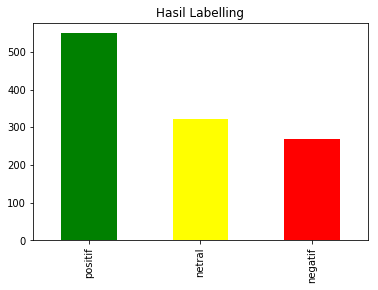

positif    549
netral     323
negatif    268
Name: Sentimen, dtype: int64


In [15]:
import matplotlib.pyplot as plt

count_Class=pd.value_counts(df_ml["Sentimen"], sort= True)
count_Class.plot(kind= 'bar', color= ["green", "yellow", "red" ])
plt.title('Hasil Labelling')
plt.show()
print(count_Class)

## **Data bersentimen positif dan negatif**

In [16]:
n_class = 2

if n_class == 2:
    df_pos = df_ml.copy()[df_ml['Sentimen'] == 'positif']
    df_neg = df_ml.copy()[df_ml['Sentimen'] == 'negatif']
    df = pd.concat([df_pos, df_neg], ignore_index=True).reset_index(drop=True)

In [18]:
df['Numbered Sentimen'] = [1 if i == 'positif' else 0 for i in df['Sentimen']]
df.to_csv("pntweet.csv")
df.head()

,Tweet,Hasil Preprocessing,Positif,Negatif,Sentimen,Numbered Sentimen
0,MRT Jakarta pas pulang kerja vibesnya singapur bgt dah dan seneng bgt aku banya cewe cantik :))))),mrt jakarta pas pulang kerja vibesnya singapur bgt dah seneng bgt banya cewe cantik,3,0,positif,1
1,"@Srisury15517295 Rencana di Jakarta, di Pacific Place, dulu waktu Burn the Stage movie, lumayan ga penuh2 amat, udh gitu bs pake MRT, ga ush nyetir macet2an??",rencana jakarta pacific place burn the stage movie lumayan tidak_penuh udh gitu bs pake mrt tidak_ush nyetir macet an,2,1,positif,1
2,@rinisetioo Untuk saat ini MRT Jakarta beroperasi normal.,mrt jakarta beroperasi normal,1,0,positif,1
3,Hati-hati ke MRT Jakarta tar pecah Lo.pecah berarti membeli.MRT Indonesia keramik asli buatan Tibet China yg ajib mahal getoh deh.megang MRT Indonesia kudu hati2 soalnya import pake container punya Jokowi.MRT lecet bisa pecah.,hati hati mrt jakarta tar pecah lo pecah membeli mrt indonesia keramik asli buatan tibet china ajib mahal getoh deh megang mrt indonesia kudu hati import pake container jokowi mrt lecet pecah,4,1,positif,1
4,"Selain #MudahkanHarimu, naik transportasi umum seperti KRL atau MRT Jakarta memiliki benefit lain loh. Yuk intip apa saja benefitnya!\n\n#WIKABeton\n#MudahkanHarimu https://t.co/0g5EvZr4Ir",transportasi krl mrt jakarta memiliki benefit loh yuk intip benefitnya,1,0,positif,1


# **7. Visualisasi**

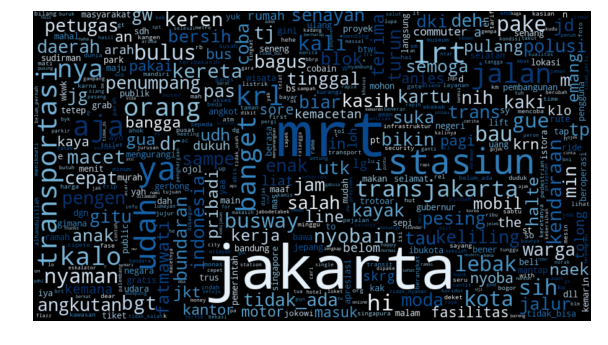

In [19]:
from wordcloud import WordCloud
from collections import Counter

all_words = []
for tweet in tqdm(df_ml['Hasil Preprocessing']):
    words = tweet.split(' ')
    for word in words:
        all_words.append(word)
    

wordfreq = Counter(all_words)

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

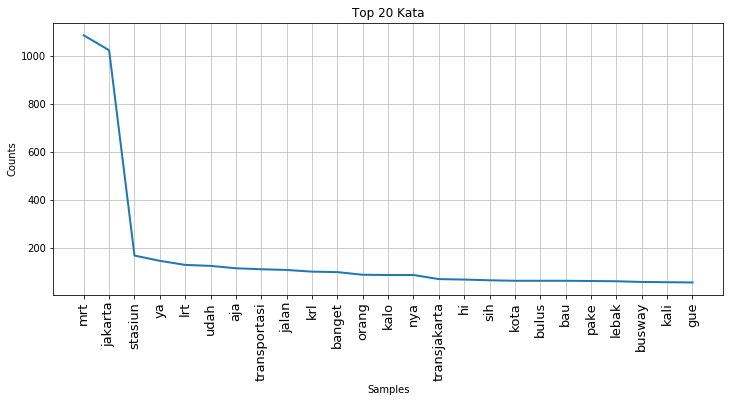

In [20]:
import nltk
all_words = []
for tweet in tqdm(df_ml['Hasil Preprocessing']):
    words = tweet.split(' ')
    for word in words:
        all_words.append(word)

plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
plt.title('Top 20 Kata')
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

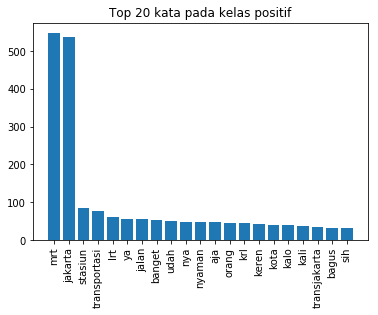

In [21]:
import itertools

positif_sentimen = df[df["Sentimen"]=="positif"]["Hasil Preprocessing"] 
l = [tweet.split() for tweet in positif_sentimen] #membuat list kata pada kelas positif
kata_positif = list(itertools.chain.from_iterable(l)) 

positif_word = Counter(kata_positif) #menhitung jumlah setiap kata pada kelas positif

positif_word = sorted(positif_word.items(), key=lambda kv: kv[1], reverse=True) #descending jumlah kata

top20_positif = positif_word[:21]
top_words_positif = [i[0] for i in top20_positif]  #top 20 positif
top_occurences_positif = [i[1] for i in top20_positif]

plt.bar(top_words_positif, top_occurences_positif)
plt.title("Top 20 kata pada kelas positif")
plt.xticks(rotation='vertical')
plt.show()

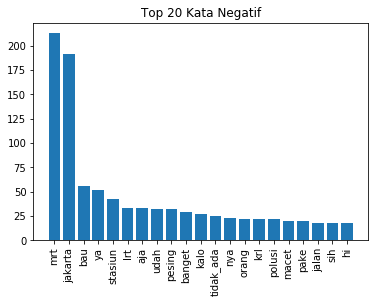

In [22]:
negatif_sentimen = df[df["Sentimen"]=="negatif"]["Hasil Preprocessing"]
k = [tweet.split() for tweet in negatif_sentimen]#membuat list kata pada kelas negatif
kata_negatif = list(itertools.chain.from_iterable(k))

negatif_word = Counter(kata_negatif) #menhitung jumlah setiap kata pada kelas negatif

negatif_word = sorted(negatif_word.items(), key=lambda kv: kv[1], reverse=True) 

top20_negatif = negatif_word[:21]
top_words_negatif = [i[0] for i in top20_negatif]  #top 20 negatif
top_occurences_negatif = [i[1] for i in top20_negatif]

plt.bar(top_words_negatif, top_occurences_negatif)
plt.title("Top 20 Kata Negatif")
plt.xticks(rotation='vertical')
plt.show()

# **8. Modelling**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection, naive_bayes, metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np




In [24]:
dfa = pd.read_csv("pntweet.csv")

from sklearn.model_selection import train_test_split

X = dfa['Hasil Preprocessing']
y = dfa['Numbered Sentimen']
SEED = 123

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

print([np.shape(X_train), np.shape(X_test)])

[(653,), (164,)]


In [25]:
train = pd.DataFrame(X_train)
train.head()

,Hasil Preprocessing
274,pantes kaya bau pesing salut petugas sigap langsung bersihkan
676,gw jg udah x pas ngetap error disuruh ngetap lg saldo kesedot double saksi
150,tidak_ke pusat jakarta tidak_naik transportasi tidak_jalan jalan jakarta bolak kantor kosan menit jalan kaki kangen krl busway eh mrt
452,semenjak mrt warga jakarta sehat trotoar lebar nyaman unt jalan kaki terima kasih ahok legacymu gub dki gub skrang melanjutkan
617,mrt sampe kawasan mrt cipete fatmawati ngeliat jakarta sanaan dikit berkabut ya etaunya polusi tebal banget kayak bulket


In [26]:
test = pd.DataFrame(X_test)

test.head()

,Hasil Preprocessing
185,nyobain mrt jakarta suka deh tidak_di kopo mrt
210,berkat org teroris masup jakarta eo ketemunya sexy killer mrt wkwkkwkwk
587,udh neng jakarta blm nyobain mrt hiks sedi
267,hujan deras menikmati jakarta keluarga
677,transjakarta mantap blok m kemana saran aja min tolong diadakan feeder st bundaran hi langsung st gambir st senen tidak_perlu repot transit halte monas menyusahkan membawa barang transit


In [27]:
null_accuracy = len(X_test[y_test == 1])/(len(X_test))
print(null_accuracy)

0.6463414634146342


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
bayes = MultinomialNB()


list_min_df = np.arange(1,6,1)
jum_fitur = np.zeros(len(list_min_df))
score_train = np.zeros(len(list_min_df))
score_test = np.zeros(len(list_min_df))

count = 0

for min_df in list_min_df:
    
    vect.set_params(min_df=min_df)
    val1_pipeline = Pipeline([
        ('vect', vect),
        ('clf', bayes)
    ])
    
    model = val1_pipeline.fit(X_train, y_train)
    
    kata = vect.get_feature_names()
    jum_fitur[count]= len(kata)
    
    score_test[count]= model.score(X_test, y_test)
 
    y_pred_class = model.predict(X_test)
    
    print('jumlah fitur = ',jum_fitur[count])
    print(classification_report(y_test,y_pred_class))
    print('\n')
    
    
    count = count + 1 

jumlah fitur =  3201.0
              precision    recall  f1-score   support

           0       0.91      0.50      0.64        58
           1       0.78      0.97      0.87       106

   micro avg       0.80      0.80      0.80       164
   macro avg       0.84      0.74      0.75       164
weighted avg       0.82      0.80      0.79       164



jumlah fitur =  1112.0
              precision    recall  f1-score   support

           0       0.89      0.57      0.69        58
           1       0.80      0.96      0.88       106

   micro avg       0.82      0.82      0.82       164
   macro avg       0.85      0.77      0.79       164
weighted avg       0.83      0.82      0.81       164



jumlah fitur =  670.0
              precision    recall  f1-score   support

           0       0.89      0.59      0.71        58
           1       0.81      0.96      0.88       106

   micro avg       0.83      0.83      0.83       164
   macro avg       0.85      0.77      0.79       164
we

In [29]:
matrix = np.matrix(np.c_[list_min_df, jum_fitur, score_test])
models = pd.DataFrame(data = matrix, columns = 
             ['min_df', 'Jumlah Fitur', 'Test Accuracy'])
models

,min_df,Jumlah Fitur,Test Accuracy
0,1.0,3201.0,0.804878
1,2.0,1112.0,0.823171
2,3.0,670.0,0.829268
3,4.0,454.0,0.804878
4,5.0,340.0,0.810976


(0.7, 1)

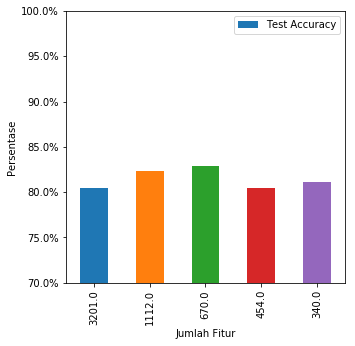

In [30]:
import matplotlib.ticker as mtick

graf = models.plot.bar(x='Jumlah Fitur',y='Test Accuracy', figsize=(5,5))
graf.set_ylabel("Persentase")
graf.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
graf.set_xlabel("Jumlah Fitur")
graf.set_ylim(0.7,1)

## **Pelatihan Model Naive Bayes**

In [31]:
null_accuracy = len(X_test[y_test == 1])/(len(X_test))
print(null_accuracy)

0.6463414634146342


In [33]:
import joblib

vect = CountVectorizer(min_df=3)
X_train_vect = vect.fit_transform(X_train).toarray()
model = naive_bayes.MultinomialNB()
model.fit(X_train_vect, y_train)
filename = 'finalized_model.pkl'
joblib.dump(model, filename)

['finalized_model.pkl']

# **9. Evaluasi Model Naive Bayes**

In [34]:
X_test_vect = vect.transform(X_test).toarray()
model = joblib.load(filename)
y_pred_class = model.predict(X_test_vect)
m_confusion_test = metrics.confusion_matrix(y_test, y_pred_class)
pd.DataFrame(data = m_confusion_test, columns = ['Prediksi Negatif', 'Prediksi Positif'],
            index = ['Hasil Labelling Negatif', 'Hasil Labelling Positif'])   

,Prediksi Negatif,Prediksi Positif
Hasil Labelling Negatif,34,24
Hasil Labelling Positif,4,102


In [35]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.89      0.59      0.71        58
           1       0.81      0.96      0.88       106

   micro avg       0.83      0.83      0.83       164
   macro avg       0.85      0.77      0.79       164
weighted avg       0.84      0.83      0.82       164



In [36]:
accuracy = m_confusion_test.trace()/m_confusion_test.sum()
print(accuracy)

0.8292682926829268


## Prediksi Kalimat

In [37]:
def test_sample(model, sample):
    sample_counts = vect.transform([sample])
    result = model.predict(sample_counts)[0]
    prob = model.predict_proba(sample_counts)[0]
    print("Prediksi oleh model sebagai %s: probabilitas negatif %f, probabilitas positif %f" % (result, prob[0], prob[1]))

model = joblib.load(filename)
test_sample(model, "perdana naik mrt jakarta.... bener bener seneng karena akhirnya indonesia punya kayak begini (walaupun baru di ibu kota, it’s okay progress takes time)")

test_sample(model, "selamat sore min, kenapa ya jalan ke arah park&ride lebak bulus bau pesing banget. mengganggu sekali min, harap diperhatikan dan cari solusi @mrtjakarta")

test_sample(model, "Tbtb pengen keliling jakarta gitu naik mrt trus masuk ke museum2 kayak nya seru Hmm")

test_sample(model, "Selamat sore @mrtjakarta saya naik dr blok m menuju lebak bulus. Pas masuk gerbong no 2 bau pesing menyengat sekali")

test_sample(model, "@mrtjakarta Naik MRT emang nyaman ya")

test_sample(model, "pak @aniesbaswedan tolong atuh pa.....nih gmn wisatawan dtng k jakarta trus stasiun @mrtjakarta bau pesing...trus mereka review k sosmed...😩 kelar dh jakarta hadeeehhh")

test_sample(model, "Nyaman nya naik MRT Jakarta")

test_sample(model, "Tempat berhenti ojek online disekitar lebak bulus grab, jauh sekali jadi tidak memudahkan konsumen untuk naik @mrtjakarta")

Prediksi oleh model sebagai 1: probabilitas negatif 0.000136, probabilitas positif 0.999864
Prediksi oleh model sebagai 0: probabilitas negatif 0.998910, probabilitas positif 0.001090
Prediksi oleh model sebagai 1: probabilitas negatif 0.081986, probabilitas positif 0.918014
Prediksi oleh model sebagai 0: probabilitas negatif 0.971544, probabilitas positif 0.028456
Prediksi oleh model sebagai 1: probabilitas negatif 0.077329, probabilitas positif 0.922671
Prediksi oleh model sebagai 0: probabilitas negatif 0.999548, probabilitas positif 0.000452
Prediksi oleh model sebagai 1: probabilitas negatif 0.015719, probabilitas positif 0.984281
Prediksi oleh model sebagai 0: probabilitas negatif 0.870998, probabilitas positif 0.129002




*   1 = positif
*   0 = negatif

